In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 

In [23]:
merge_player = pd.read_csv('AustralianOpen.csv')
merge_player['count'] = 0


In [24]:
merge_player_w = merge_player[merge_player.winner==True]
merge_player_l = merge_player[merge_player.winner==False]

In [25]:
aus_win = merge_player_w[['tournament','fullname','count']]
aus_lose = merge_player_l[['tournament','fullname','count']]

In [26]:
aus_win

tournament        fullname  count
0     Australian Open  Kevin Anderson      0
4     Australian Open  Kevin Anderson      0
5     Australian Open  Kevin Anderson      0
6     Australian Open  Kevin Anderson      0
8     Australian Open  Kevin Anderson      0
...               ...             ...    ...
5031  Australian Open  Mark Woodforde      0
5033  Australian Open     Jan Kroslak      0
5038  Australian Open   Kevin Ullyett      0
5040  Australian Open    Michael Hill      0
5044  Australian Open    Leander Paes      0

[2524 rows x 3 columns]

In [27]:
aus_win = aus_win.groupby(['tournament', 'fullname']).count()
aus_win = aus_win.reset_index()
aus_win.columns = ['tournament', 'fullname', 'Count_Win']

In [28]:
aus_win

tournament            fullname  Count_Win
0    Australian Open    Adrian Mannarino          5
1    Australian Open       Adrian Voinea          6
2    Australian Open     Agustin Calleri          4
3    Australian Open        Albert Costa          7
4    Australian Open     Albert Montanes          4
..               ...                 ...        ...
387  Australian Open  Yevgeny Kafelnikov         12
388  Australian Open  Yoshihito Nishioka          3
389  Australian Open   Younes El Aynaoui         10
390  Australian Open       Yuichi Sugita          1
391  Australian Open      Zack Fleishman          1

[392 rows x 3 columns]

In [29]:
aus_lose = aus_lose.groupby(['tournament', 'fullname']).count()
aus_lose = aus_lose.reset_index()
aus_lose.columns = ['tournament', 'fullname', 'Count_Lose']

In [30]:
aus_winner = pd.merge(aus_win, aus_lose, on=['tournament', 'fullname'])

In [31]:
aus_winner

tournament            fullname  Count_Win  Count_Lose
0    Australian Open    Adrian Mannarino          5          10
1    Australian Open       Adrian Voinea          6           4
2    Australian Open     Agustin Calleri          4           9
3    Australian Open        Albert Costa          7           5
4    Australian Open     Albert Montanes          4          13
..               ...                 ...        ...         ...
387  Australian Open  Yevgeny Kafelnikov         12           4
388  Australian Open  Yoshihito Nishioka          3           4
389  Australian Open   Younes El Aynaoui         10           5
390  Australian Open       Yuichi Sugita          1           2
391  Australian Open      Zack Fleishman          1           2

[392 rows x 4 columns]

In [32]:
aus_winner['total_play'] = aus_winner['Count_Win'] + aus_winner['Count_Lose']
aus_winner['perc_win'] = round(aus_winner['Count_Win'] / aus_winner['total_play'],4)*100
aus_winner = aus_winner[aus_winner.total_play > 5]

In [33]:
aus_winner.sort_values(by='perc_win', ascending=False).head(30)

tournament            fullname  Count_Win  Count_Lose  total_play  \
26   Australian Open        Andre Agassi         30           2          32   
277  Australian Open      Novak Djokovic         67           8          75   
320  Australian Open       Roger Federer         97          14         111   
287  Australian Open      Patrick Rafter          5           1           6   
303  Australian Open        Rafael Nadal         61          13          74   
228  Australian Open         Marat Safin         29           7          36   
226  Australian Open       Magnus Norman          8           2          10   
40   Australian Open         Andy Murray         48          13          61   
292  Australian Open        Pete Sampras         11           3          14   
41   Australian Open        Andy Roddick         38          11          49   
183  Australian Open  Jo Wilfried Tsonga         36          11          47   
382  Australian Open      Wayne Ferreira         16           5          21   
68   Australian Open      Chris Woodruff          6           2           8   
204  Australian Open       Kei Nishikori         27           9          36   
387  Australian Open  Yevgeny Kafelnikov         12           4          16   
368  Australian Open       Tomas Berdych         47          16          63   
262  Australian Open        Milos Raonic         26           9          35   
340  Australian Open       Stan Wawrinka         37          13          50   
238  Australian Open         Marin Cilic         29          11          40   
81   Australian Open    David Nalbandian         26          10          36   
79   Australian Open        David Ferrer         41          16          57   
135  Australian Open     Grigor Dimitrov         23           9          32   
343  Australian Open  Stefanos Tsitsipas          5           2           7   
334  Australian Open  Sebastien Grosjean         25          10          35   
180  Australian Open          Jiri Novak         10           4          14   
358  Australian Open    Thomas Johansson         17           7          24   
240  Australian Open         Mario Ancic         14           6          20   
158  Australian Open         James Blake         21           9          30   
145  Australian Open         Hyeon Chung          7           3          10   
364  Australian Open         Todd Martin          9           4          13   

     perc_win  
26      93.75  
277     89.33  
320     87.39  
287     83.33  
303     82.43  
228     80.56  
226     80.00  
40      78.69  
292     78.57  
41      77.55  
183     76.60  
382     76.19  
68      75.00  
204     75.00  
387     75.00  
368     74.60  
262     74.29  
340     74.00  
238     72.50  
81      72.22  
79      71.93  
135     71.88  
343     71.43  
334     71.43  
180     71.43  
358     70.83  
240     70.00  
158     70.00  
145     70.00  
364     69.23

In [36]:
top_aus = aus_winner[aus_winner.tournament == 'Australian Open'].sort_values(by='perc_win', ascending = False).head(10)


Text(0.5, 1.0, 'Best players in Australian Open')

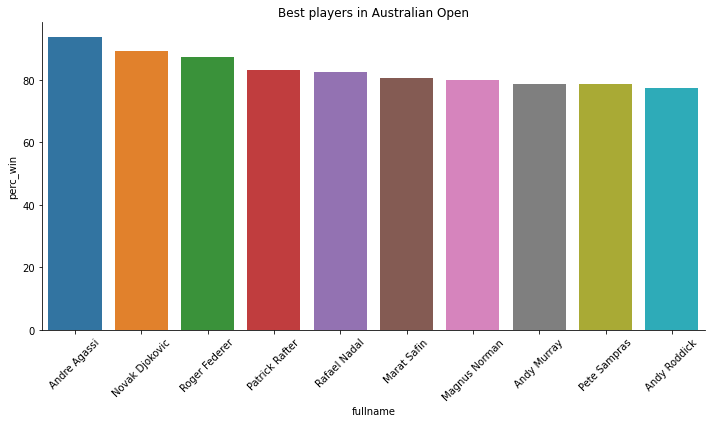

In [38]:
g=sns.catplot(x='fullname', y='perc_win', data=top_aus, kind='bar', height=5, aspect=2)
g.set_xticklabels(labels = top_aus.fullname,  rotation=45)
plot.title('Best players in Australian Open')

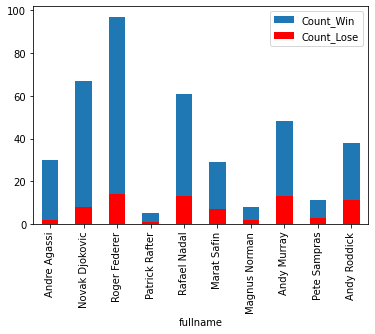

In [40]:
ax = plot.gca()
top_aus.plot(x='fullname',y='Count_Win',kind='bar',ax=ax)
top_aus.plot(x='fullname',y='Count_Lose',kind='bar',color = 'red',ax=ax)
top_aus_win_lose = top_aus.copy()

